In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from collections import Counter

# Generate imbalanced dataset (99:1 ratio)
X, y = make_classification(n_samples=10000, n_features=10,
                          n_redundant=2, weights=[0.99],
                          flip_y=0, random_state=42)
print("Class distribution:", Counter(y))

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standard SVM (no class weighting)
svm_standard = SVC(kernel='linear', probability=True)
svm_standard.fit(X_train, y_train)
y_pred = svm_standard.predict(X_test)
y_proba = svm_standard.predict_proba(X_test)[:, 1]

print("\n=== Standard SVM (unweighted) ===")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Weighted SVM (adjusting for class imbalance)
svm_weighted = SVC(kernel='linear', class_weight='balanced', probability=True)
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)
y_proba_weighted = svm_weighted.predict_proba(X_test)[:, 1]

print("\n=== Weighted SVM (balanced) ===")
print(classification_report(y_test, y_pred_weighted))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_weighted))

Class distribution: Counter({np.int64(0): 9900, np.int64(1): 100})

=== Standard SVM (unweighted) ===
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2974
           1       0.00      0.00      0.00        26

    accuracy                           0.99      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.98      0.99      0.99      3000

ROC-AUC: 0.7306399048160985


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Weighted SVM (balanced) ===
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      2974
           1       0.07      0.96      0.12        26

    accuracy                           0.88      3000
   macro avg       0.53      0.92      0.53      3000
weighted avg       0.99      0.88      0.93      3000

ROC-AUC: 0.9602969323883916


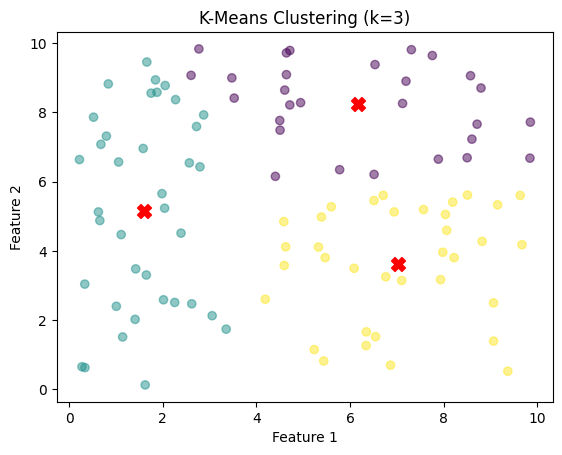

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Generate random data
# np.random.seed(42)
X = np.random.rand(100, 2) * 10  # 100 points in 2D space

n=3
kmeans = KMeans(n_clusters=n, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100)
plt.title(f"K-Means Clustering (k={n})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
